In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("C:/Users/gaonk/OneDrive/Desktop/ML/MLPractice/ML Dataset/ML Dataset/Admission_Predict.csv")
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [4]:
features_cols = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = data[features_cols]
print(X)

data['Chance of Admit '] = np.where(data['Chance of Admit '] > 0.9, 1, 0)
print(data['Chance of Admit '].head())
Y = data['Chance of Admit ']

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  
0           1  
1           1  
2  

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

print("Training Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100 ,"%")

Training Accuracy:  1.0
Testing Accuracy:  97.5 %


In [6]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)

print("Cross-Value Score: ", cross_val_score(clf1, x_train, y_train, cv=10, scoring='accuracy').mean())
y_pred = clf1.predict(x_test)
print("Testing Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100, "%")

Cross-Value Score:  0.9571428571428571
Testing Accuracy:  97.5 %


[Text(0.35714285714285715, 0.9444444444444444, 'x[6] <= 9.245\ngini = 0.219\nsamples = 280\nvalue = [245, 35]'),
 Text(0.21428571428571427, 0.8333333333333334, 'x[1] <= 335.0\ngini = 0.016\nsamples = 241\nvalue = [239, 2]'),
 Text(0.14285714285714285, 0.7222222222222222, 'x[6] <= 9.205\ngini = 0.008\nsamples = 240\nvalue = [239, 1]'),
 Text(0.07142857142857142, 0.6111111111111112, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]'),
 Text(0.21428571428571427, 0.6111111111111112, 'x[1] <= 321.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2857142857142857, 0.7222222222222222, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.8333333333333334, 'x[7] <= 0.5\ngini = 0.26\nsamples = 39\nvalue = [6, 33]'),
 Text(0.42857142857142855, 0.7222222222222222, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.7222222222

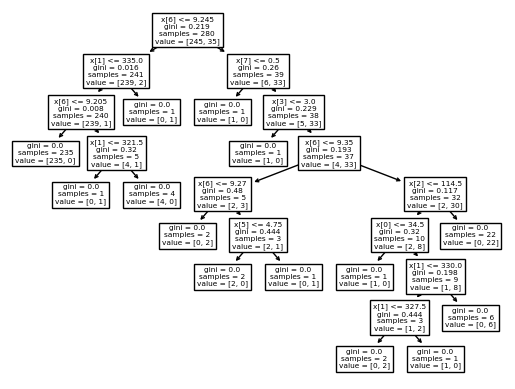

In [7]:
tree.plot_tree(clf)